In [1]:
DF <- read.table( "sample-TokyoSTAT.csv",
                  sep = ",",                
                  header = TRUE,            
                  stringsAsFactors = FALSE, 
                  fileEncoding="UTF-8")     

In [2]:
DF$区部 <- "市町"          
DF[1:23, ]$区部 <- "区"    

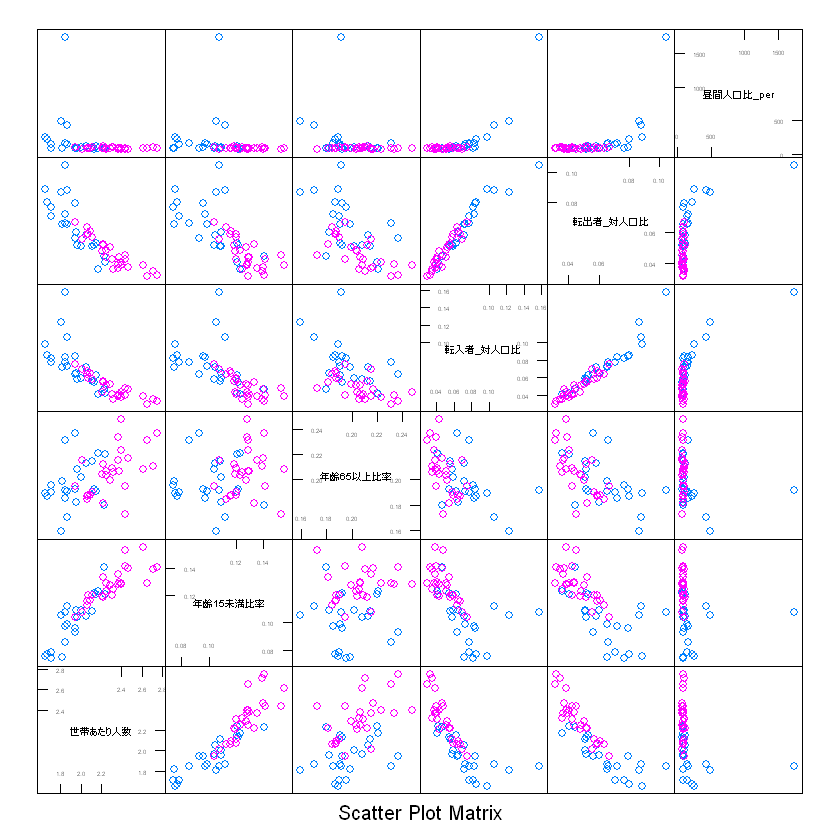

In [3]:
library(lattice)
splom(DF[, -c(1, 2, 9)],   
      groups=DF$区部,      
      axis.text.cex=.3,    
      varname.cex=.5)      

In [4]:
library(ggplot2)
library(GGally)
ggpairs(DF[, -c(1, 2)],                   
        aes( colour=as.factor(区部),      
             alpha=0.5),                  
        upper=list(continuous=wrap("cor", size=3)) ) +
  theme(axis.text =element_text(size=6),  
        strip.text=element_text(size=6))  

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'GGally' was built under R version 3.6.3"

ERROR: Error: package 'ggplot2' 3.1.1 is loaded, but >= 3.3.0 is required by 'GGally'


In [5]:
COR <- cor(DF[, -c(1, 2, 9)])
COR

,世帯あたり人数,年齢15未満比率,年齢65以上比率,転入者_対人口比,転出者_対人口比,昼間人口比_per
世帯あたり人数,1.0000000,0.8960259,0.4728719,-0.7837793,-0.8609970,-0.2960266
年齢15未満比率,0.8960259,1.0000000,0.1719359,-0.6293479,-0.7297224,-0.1641727
年齢65以上比率,0.4728719,0.1719359,1.0000000,-0.5215069,-0.5887915,-0.2299990
転入者_対人口比,-0.7837793,-0.6293479,-0.5215069,1.0000000,0.9599464,0.7462093
転出者_対人口比,-0.8609970,-0.7297224,-0.5887915,0.9599464,1.0000000,0.6010949
昼間人口比_per,-0.2960266,-0.1641727,-0.2299990,0.7462093,0.6010949,1.0000000


In [6]:
library(qgraph)
qgraph( COR, 
        minimum=.20,         
        labels=colnames(COR),
        edge.labels=T,       
        label.scale=F,         
        label.cex=0.8,       
        edge.label.cex=1.4 ) 

ERROR: Error in library(qgraph): there is no package called 'qgraph'


In [7]:
TestRes <- cor.test(DF$世帯あたり人数, DF$昼間人口比_per)
TestRes


	Pearson's product-moment correlation

data:  DF$世帯あたり人数 and DF$昼間人口比_per
t = -2.1472, df = 48, p-value = 0.03686
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.53064969 -0.01926643
sample estimates:
       cor 
-0.2960266 
